In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
death_url =  "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"
deaths_df = pd.read_csv(death_url, error_bad_lines=False)

cases_url =  "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
cases_df = pd.read_csv(cases_url, error_bad_lines=False)

# states_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/05-08-2020.csv"
# states_df = pd.read_csv(states_url, error_bad_lines=False)

county_level = "https://raw.githubusercontent.com/Yu-Group/covid19-severity-prediction/master/data/county_data_abridged.csv"
county_df = pd.read_csv(county_level, error_bad_lines=False)

In [3]:
county_df.columns.values

array(['countyFIPS', 'STATEFP', 'COUNTYFP', 'CountyName', 'StateName',
       'State', 'lat', 'lon', 'POP_LATITUDE', 'POP_LONGITUDE',
       'CensusRegionName', 'CensusDivisionName',
       'Rural-UrbanContinuumCode2013', 'PopulationEstimate2018',
       'PopTotalMale2017', 'PopTotalFemale2017', 'FracMale2017',
       'PopulationEstimate65+2017', 'PopulationDensityperSqMile2010',
       'CensusPopulation2010', 'MedianAge2010',
       '#EligibleforMedicare2018', 'MedicareEnrollment,AgedTot2017',
       '3-YrDiabetes2015-17', 'DiabetesPercentage',
       'HeartDiseaseMortality', 'StrokeMortality', 'Smokers_Percentage',
       'RespMortalityRate2014', '#FTEHospitalTotal2017',
       "TotalM.D.'s,TotNon-FedandFed2017",
       '#HospParticipatinginNetwork2017', '#Hospitals', '#ICU_beds',
       'dem_to_rep_ratio', 'PopMale<52010', 'PopFmle<52010',
       'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
       'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
       'PopMale

In [4]:
states_df.head()

NameError: name 'states_df' is not defined

In [5]:
cases_df[cases_df['Admin2'] == 'Alameda']

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20
191,84006001,US,USA,840,6001.0,Alameda,California,US,37.646294,-121.892927,...,1603,1636,1706,1749,1776,1809,1863,1917,1961,2023


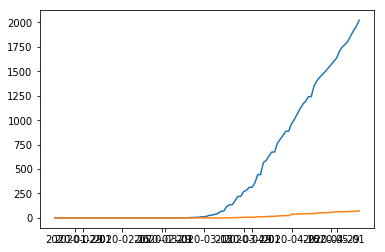

In [6]:
cases_df.columns.values
dates = cases_df.columns[11:]
x=pd.to_datetime(dates).values
y=cases_df[cases_df['Admin2'] == 'Alameda'][dates].iloc[0].values
sns.lineplot(x=x, y=y)
y=deaths_df[deaths_df['Admin2'] == 'Alameda'][dates].iloc[0].values
sns.lineplot(x=x, y=y)

In [7]:
county_df.columns

Index(['countyFIPS', 'STATEFP', 'COUNTYFP', 'CountyName', 'StateName', 'State',
       'lat', 'lon', 'POP_LATITUDE', 'POP_LONGITUDE', 'CensusRegionName',
       'CensusDivisionName', 'Rural-UrbanContinuumCode2013',
       'PopulationEstimate2018', 'PopTotalMale2017', 'PopTotalFemale2017',
       'FracMale2017', 'PopulationEstimate65+2017',
       'PopulationDensityperSqMile2010', 'CensusPopulation2010',
       'MedianAge2010', '#EligibleforMedicare2018',
       'MedicareEnrollment,AgedTot2017', '3-YrDiabetes2015-17',
       'DiabetesPercentage', 'HeartDiseaseMortality', 'StrokeMortality',
       'Smokers_Percentage', 'RespMortalityRate2014', '#FTEHospitalTotal2017',
       'TotalM.D.'s,TotNon-FedandFed2017', '#HospParticipatinginNetwork2017',
       '#Hospitals', '#ICU_beds', 'dem_to_rep_ratio', 'PopMale<52010',
       'PopFmle<52010', 'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
       'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
       'PopMale20-242010', 'P

In [8]:
unabridged = pd.read_csv('./covid19/unabridged.csv')
unabridged.head()

/home/victor/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,countyFIPS,CountyName,StateName,State,lat,lon,STATEFP,COUNTYFP,POP_LATITUDE,POP_LONGITUDE,...,Poverty Num All Ages 2018,Poverty Pct All Ages 2018,Poverty Num Ages 0-17 2018,Poverty Pct Ages 0-17 2018,Poverty Num Ages 5-17 2018,Poverty Pct Ages 5-17 2018,Median Household Income 2018,FracMale2017,#FTEHospitalTotal2017,mortality2015-17Estimated
0,1001,Autauga,AL,Alabama,32.540091,-86.645649,1.0,1.0,32.500389,-86.494165,...,7587.0,13.8,2509.0,19.3,1891.0,19.5,59338.0,0.486578,324.0,NaN
1,1003,Baldwin,AL,Alabama,30.738314,-87.726272,1.0,3.0,30.548923,-87.762381,...,21069.0,9.8,6442.0,13.9,4534.0,13.1,57588.0,0.485472,2101.0,NaN
2,1005,Barbour,AL,Alabama,31.874030,-85.397327,1.0,5.0,31.844036,-85.310038,...,6788.0,30.9,2242.0,43.9,1411.0,36.7,34382.0,0.527701,181.0,NaN
3,1007,Bibb,AL,Alabama,32.999024,-87.125260,1.0,7.0,33.030921,-87.127659,...,4400.0,21.8,1238.0,27.8,840.0,26.3,46064.0,0.535469,145.0,NaN
4,1009,Blount,AL,Alabama,33.990440,-86.562711,1.0,9.0,33.955243,-86.591491,...,7527.0,13.2,2374.0,18.0,1520.0,15.5,50412.0,0.493114,103.0,NaN


In [9]:
to_keep = list(county_df.columns)
to_keep += ['HPSAName', 'HPSAMetroIndicator', 'HPSARuralStatus', 'HPSAPercentPoverty', '% Uninsured', 
            'High School Graduation Rate', '% Some College', '% Unemployed', '% Children in Poverty', 'Income Ratio', 
            '% Single-Parent Households', 'Social Association Rate', '% Severe Housing Problems',
            'Urban Influence Code 2013', 'Poverty Num All Ages 2018', 'Poverty Num Ages 0-17 2018', 
            'Poverty Num Ages 5-17 2018', 'Poverty Pct All Ages 2018', 'Poverty Pct Ages 0-17 2018',
            'Poverty Pct Ages 5-17 2018', 'Median Household Income 2018', '60plusPerICUBed', 'SVIPercentileSEtheme',
            'SVIPercentileHDtheme', 'SVIPercentileMLtheme', 'SVIPercentileHTtheme', 'HPSAServedPop', 
            'HPSAUnderservedPop', 'Primary Care Physicians Ratio', 'Dentist Ratio', 'Mental Health Provider Ratio',
            '% Fair or Poor Health', 'Average Number of Physically Unhealthy Days', 
            'Average Number of Mentally Unhealthy Days', '% Low Birthweight', '% Adults with Obesity', 
            'Food Environment Index', '% Physically Inactive', '% With Access to Exercise Opportunities',
            '% Excessive Drinking', 'Chlamydia Rate', 'Teen Birth Rate', 'Preventable Hospitalization Rate',
            '% Vaccinated', 'Violent Crime Rate', 'Injury Death Rate', 'Average Daily PM2.5', 
            'Presence of Water Violation', '% Drive Alone to Work', '% Long Commute - Drives Alone'
            ]
date_variable_columns = ['observed_ili%Y-%m-%d', 'forecast_expected%Y-%m-%d', 'daily_visitation_diff%Y-%m-%d', 
                         'encounter_rate%Y-%m-%d', 'VMT_per_capita%Y-%m-%d', 'VMT_percent_change%Y-%m-%d',
                         'completely_home_device_county_{DATE}', 'part_time_work_behavior_devices_{DATE}', 
                         'full_time_work_behavior_devices_{DATE}', 'delivery_behavior_devices_{DATE}', 
                         'at_home_by_each_hour_{#}_{DATE}', 'destination_cbgs_{DATE}', 'n_places_{CATEGORY}' 
                        ]
unabridged[to_keep].to_csv('./covid19/small_abridged.csv')

In [49]:
list(unabridged.columns.values)

['countyFIPS',
 'CountyName',
 'StateName',
 'State',
 'lat',
 'lon',
 'STATEFP',
 'COUNTYFP',
 'POP_LATITUDE',
 'POP_LONGITUDE',
 'CensusRegionCode',
 'CensusRegionName',
 'CensusDivisionCode',
 'CensusDivisionName',
 'FederalRegionCode',
 'SSABeneficiaryCode',
 'CoreBasedStatAreaCode(CBSA)Metropolitan/Micropolitan2018',
 'CoreBasedStatAreaName(CBSA)Metropolitan/Micropolitan2018',
 'CBSAIndicatorCode0=Not,1=Metro,2=Micro2018',
 'CBSACountyStatusCentralorOutlying2018',
 'MetropolitanDivisionCode2018',
 'MetropolitanDivisionName2018',
 'CombinedStatisticalAreaCode2018',
 'CombinedStatisticalAreaName2018',
 'Rural-UrbanContinuumCode2013',
 'UrbanInfluenceCode2013',
 'Economic-DependntTypologyCode2015',
 'Farming-DependentTypologyCode2015',
 'Mining-DependentTypologyCode2015',
 'Manufacturing-DepTypologyCode2015',
 'Fed/StGovt-DepdntTypolgyCodeFederal/StateGovernment2015',
 'RecreationTypolpgyCode2015',
 'Nonspecializd-DepTypologyCode2015',
 'LowEducationTypologyCode2015',
 'LowEmployment